In [1]:
# for good measure
%config Completer.use_jedi = False

In [2]:
from ml_algorithms.linear_regression import LinearRegression

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [3]:
# some handy functions we need
def mse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

In [4]:
X, y = datasets.make_regression(
    n_samples=1000, n_features=1, noise=10, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [5]:
linear_regressor = LinearRegression(lr=0.01, n_iters=10000)
linear_regressor.fit(X_train, y_train)
predictions = linear_regressor.predict(X_test)

In [6]:
mse = mse(y_test, predictions)
print('MSE: %f' % mse)

MSE: 104.971878


In [7]:
corr_matrix = np.corrcoef(y_test, predictions)
corr = corr_matrix[0, 1]**2
print('Corr: ', corr)

Corr:  0.709158549017201


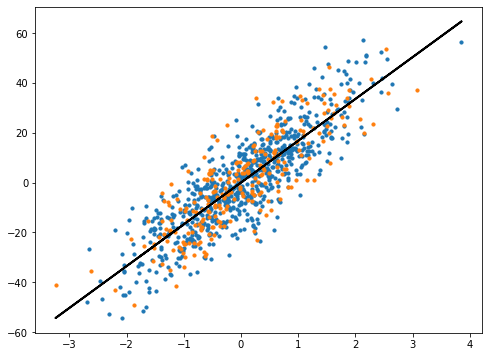

In [8]:
y_pred_line = linear_regressor.predict(X)
# cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, s=10)
m2 = plt.scatter(X_test, y_test, s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
plt.show()